In [1]:
import numpy as np 
import matplotlib.pylab as plt
import scipy.stats as ss

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

### Load Predictions

In [2]:
allPred = np.load('../Data/allPreditions.npz')['arr_0']

In [3]:
def tableCoeff(allPred, index = 0):
    N   = len(allPred)
    rec = []
    for i in range(N):
        rec.append(allPred[i][index])
        
    return np.array(rec)

In [86]:
indexSelect = 2
table = tableCoeff(allPred, index = indexSelect)
table = table[~np.isnan(table).any(axis=1)]

### Single Plots

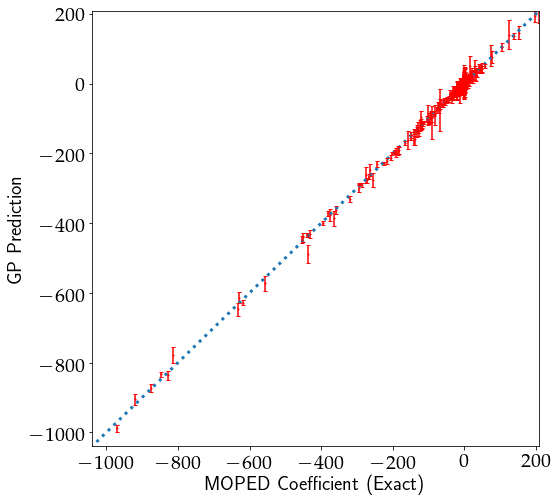

In [87]:
minX = np.min(table[:,0])
maxX = np.max(table[:,0])
grid = np.linspace(minX, maxX, 1000)

plt.figure(figsize = (8,8))
plt.plot(grid, grid, lw = 3, linestyle = ':')
plt.errorbar(table[:,0], table[:,1], yerr=3*table[:,2], fmt='ro', markersize='1',capsize=2)
plt.xlim(minX+1500, maxX)
plt.ylim(minX+1500, maxX)
plt.xlabel('MOPED Coefficient (Exact)', fontsize = fontSize)
plt.ylabel('GP Prediction', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

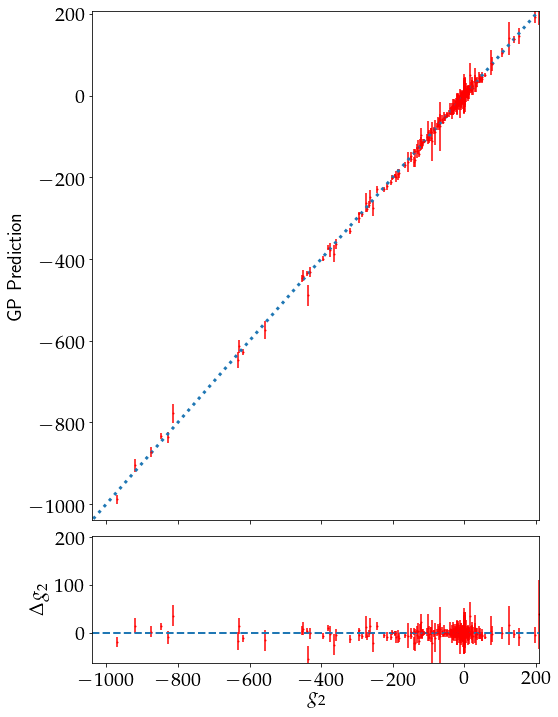

In [112]:
f, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize = (8,12),sharex=True)
ax0.plot(grid, grid, lw = 3, linestyle = ':')
ax0.errorbar(table[:,0], table[:,1], yerr=3*table[:,2], fmt='ro', markersize='1',capsize=0.0)
ax0.set_xlim(minX+1500, maxX)
ax0.set_ylim(minX+1500, maxX)
ax0.set_ylabel('GP Prediction', fontsize = fontSize)
ax0.tick_params(axis='x', labelsize=fontSize)
ax0.tick_params(axis='y', labelsize=fontSize)

res = table[:,1]-table[:,0]
ax1.axhline(0, lw = 2, linestyle = '--')
ax1.errorbar(table[:,0], res, yerr=3*table[:,2], fmt='ro', markersize='1',capsize=0.0)
ax1.set_ylabel('$\Delta g_{%d}$'%indexSelect, fontsize = fontSize)
ax1.set_xlabel('$g_{%d}$'%indexSelect, fontsize = fontSize)
ax1.tick_params(axis='x', labelsize=fontSize)
ax1.tick_params(axis='y', labelsize=fontSize)
ax1.set_xlim(minX+1500, maxX)
ax1.set_ylim(np.min(res)-10, np.max(res)+10)

plt.subplots_adjust(hspace=0.05)
plt.show()

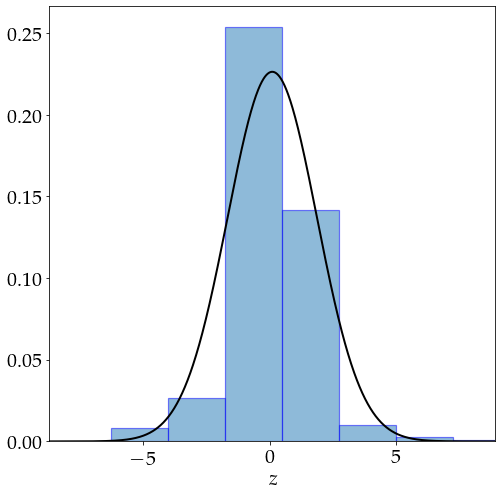

In [15]:
samples = (table[:,1] - table[:,0])/table[:,2]
mu      = np.mean(samples)
std     = np.std(samples)
dist    = ss.norm(mu, std)
xGrid   = np.linspace(mu - 5*std, mu + 5*std, 1000)
pdf     = dist.pdf(xGrid)

plt.figure(figsize = (8,8))
plt.hist(samples, density=True, edgecolor='blue', linewidth=1.2, alpha = 0.5, bins = 10)
plt.plot(xGrid, pdf, lw = 2, c = 'k')
plt.xlabel('$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(xGrid), max(xGrid))
plt.show()

### Subplots (Errors)

In [113]:
def scatterBox(ax, index):
    table = tableCoeff(allPred, index = index)
    table = table[~np.isnan(table).any(axis=1)]
    
    minX = np.min(table[:,0])
    maxX = np.max(table[:,0])
    grid = np.linspace(minX, maxX, 1000)

    ax.plot(grid, grid, lw = 3, linestyle = ':')
    ax.errorbar(table[:,0], table[:,1], yerr=3*table[:,2], fmt='ro', markersize='1',capsize=2)
    ax.set_xlim(minX, maxX)
    ax.set_ylim(minX, maxX)
    ax.set_xlabel('$g_{%d}$'%(index+1), fontsize = fontSize)
    ax.set_ylabel('$g_{%d}$ (GP)'%(index+1), fontsize = fontSize)
    ax.tick_params(axis='x', labelsize=fontSize)
    ax.tick_params(axis='y', labelsize=fontSize)
    ax.set(adjustable='box', aspect='equal')
    
    return None

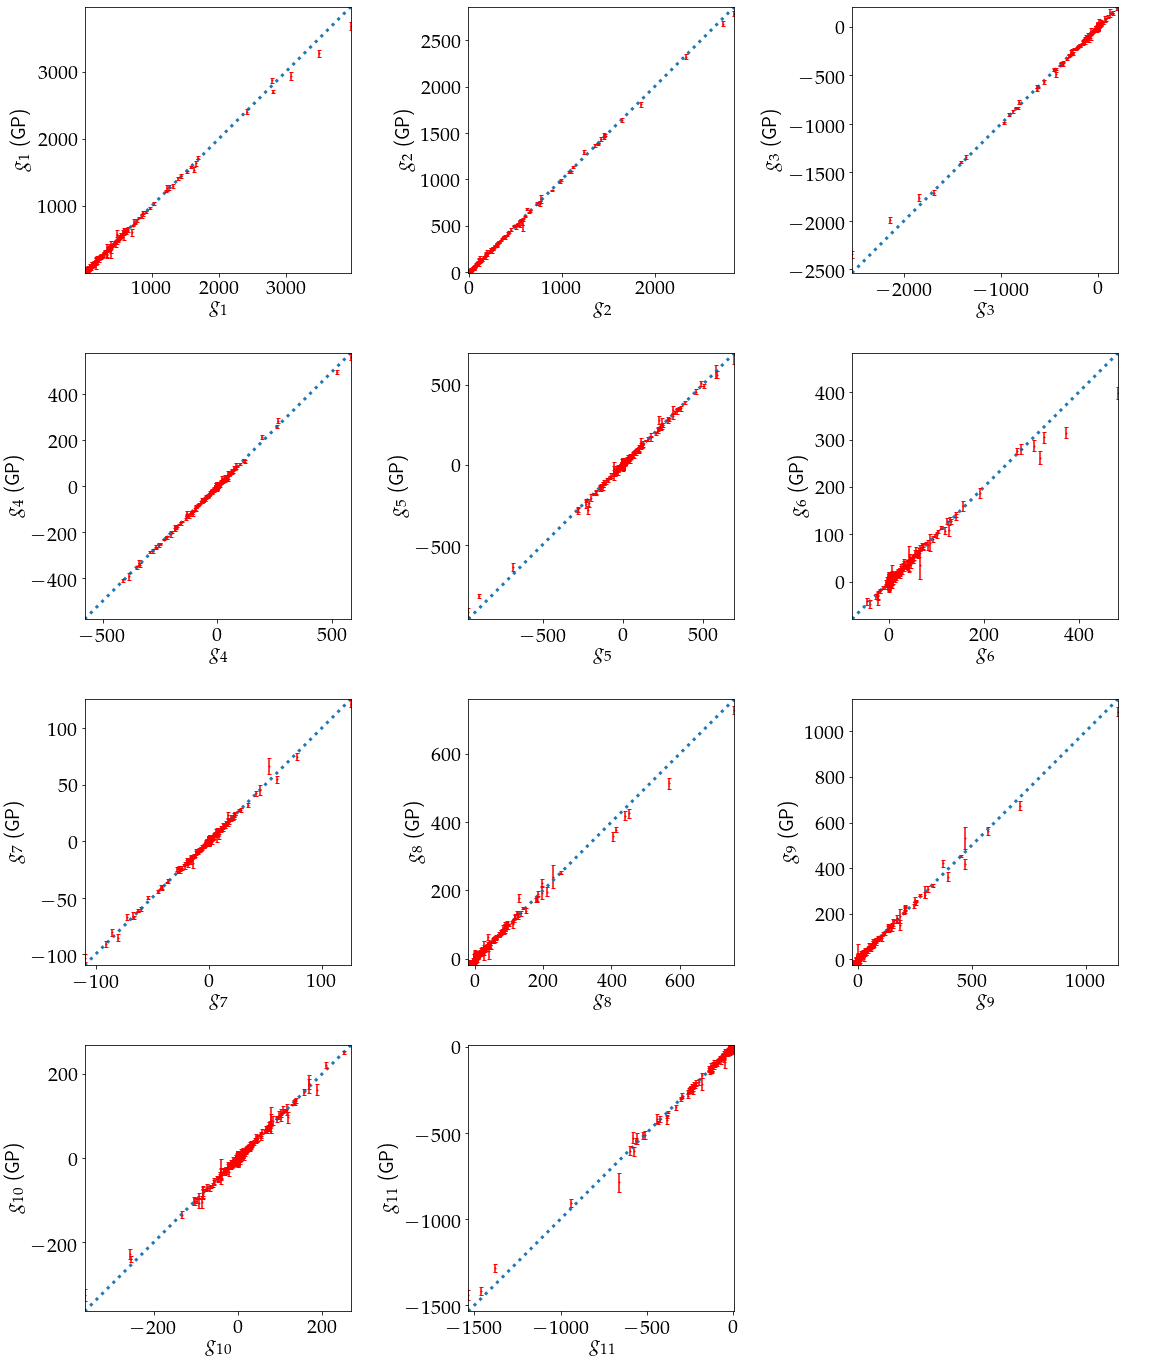

In [114]:
fig, axes = plt.subplots(4, 3, figsize = (20, 24))
for i, ax in enumerate(fig.axes):
    if i<=10:
        scatterBox(ax, index = i)
axes[-1,-1].axis('off')
plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()

### Subplots (Histogram)

In [117]:
def histogramBox(ax, index):

    table = tableCoeff(allPred, index = index)
    table = table[~np.isnan(table).any(axis=1)]

    samples = (table[:,1] - table[:,0])/table[:,2]
    mu      = np.mean(samples)
    std     = np.std(samples)
    dist    = ss.norm(mu, std)
    xGrid   = np.linspace(mu - 5*std, mu + 5*std, 1000)
    pdf     = dist.pdf(xGrid)
    
    print('Mean and Standard Deviation are {0:.2f} and {1:.2f}'.format(mu, std))


    ax.hist(samples, density=True, edgecolor='blue', linewidth=1.2, alpha = 0.5, bins = 10)
    ax.plot(xGrid, pdf, lw = 2, c = 'k')
    # ax.plot(xGrid, ss.norm(0,1).pdf(xGrid), lw = 2, c = 'r', linestyle = ':')
    ax.set_xlabel('$z$', fontsize = fontSize)
    ax.tick_params(axis='x', labelsize=fontSize)
    ax.tick_params(axis='y', labelsize=fontSize)
    ax.set_xlim(min(xGrid), max(xGrid))
    
    return None

Mean and Standard Deviation are -0.08 and 1.85
Mean and Standard Deviation are -0.04 and 1.68
Mean and Standard Deviation are 0.11 and 1.76
Mean and Standard Deviation are 0.14 and 1.63
Mean and Standard Deviation are -0.01 and 1.55
Mean and Standard Deviation are -0.17 and 1.88
Mean and Standard Deviation are 0.07 and 1.67
Mean and Standard Deviation are -0.05 and 1.86
Mean and Standard Deviation are -0.12 and 1.51
Mean and Standard Deviation are -0.08 and 1.47
Mean and Standard Deviation are 0.08 and 1.59


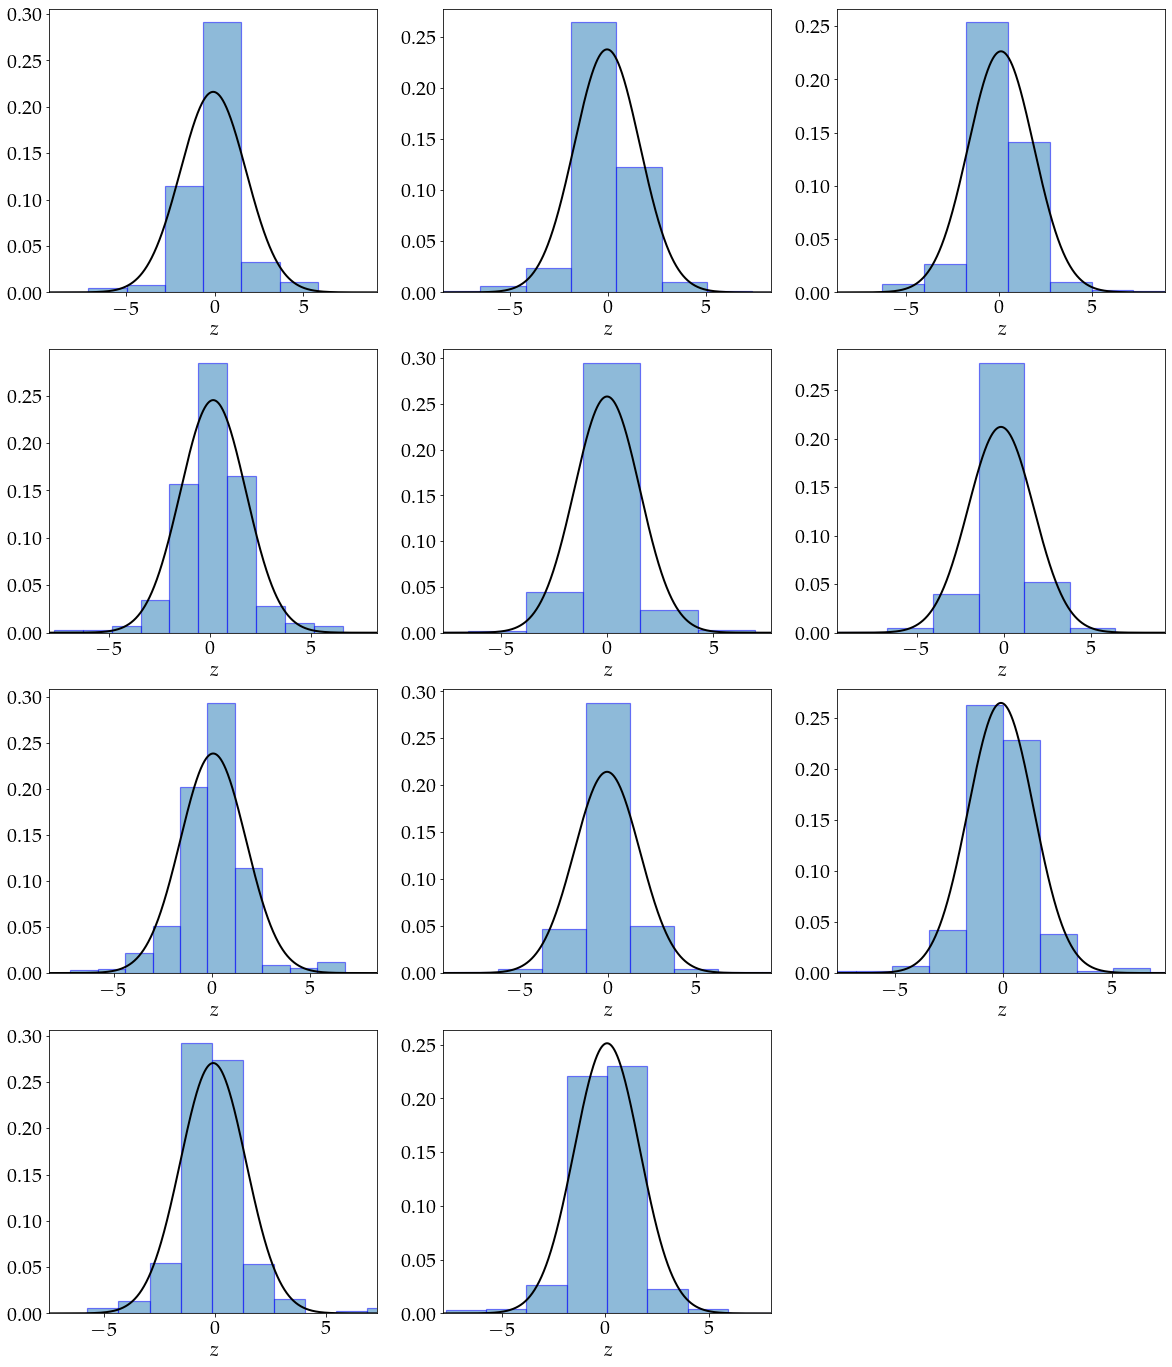

In [118]:
fig, axes = plt.subplots(4, 3, figsize = (20, 24))
for i, ax in enumerate(fig.axes):
    if i<=10:
        histogramBox(ax, index = i)
axes[-1,-1].axis('off')
plt.show()